# Anomaly Detection


First upload sunspots.txt dataset using the code below. The datafile was obtained on this website: http://www.sidc.be/silso/dayssnplot and sligthly modified to fit our purpose.

In [0]:
# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

In [2]:
upload_files()

Saving sunspots.csv to sunspots.csv
User uploaded file "sunspots.csv" with length 6205 bytes


#Initial overview 

Load dataset into pandas. Take a note that csv file is missing header row, add missing column names (Year, Month, Avg sun spots) and display few rows to make sure data is loaded correctly (the first date is Jan 1980).

In [4]:
import pandas as pd

sunspots_per_month = pd.read_csv("sunspots.csv", names=['Year', 'Month', 'Avg sun spots'], header=None)

sunspots_per_month.head()

,Year,Month,Avg sun spots
0,1980,1,226.1
1,1980,2,219.4
2,1980,3,178.7
3,1980,4,232.2
4,1980,5,254.7


## Plot 

Let's do a simple plot where x axis is year-month and y axis average number of spots recorded that month

Extra: make x axis in form of YYYY-MM (tip add new column in dataframe) and display every 6th label (tip: use plt.xticks - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html) and rotate it 45 degrees

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot(x, y, rolling_average=None, outliers=None):
  
  # Create plot
  plt.figure(figsize=(len(x)/18, 6), dpi=84)

  plt.plot(x, y, color='black', marker='.', linestyle='')
  plt.title("Average sun spots per month")
  plt.xlabel("Date")
  plt.ylabel("Average sun spots")
  plt.xlim(0, len(x) + 1)
  plt.xticks(range(0,len(x),6), sunspots_per_month['Date'].values[::6], rotation=45)

  if rolling_average is not None:
    plt.plot(x, rolling_average, color='blue')
    
  if outliers is not None:
    plt.plot(x, outliers, color='red', marker='o', linestyle='')
  
  plt.grid(True)
  plt.show()

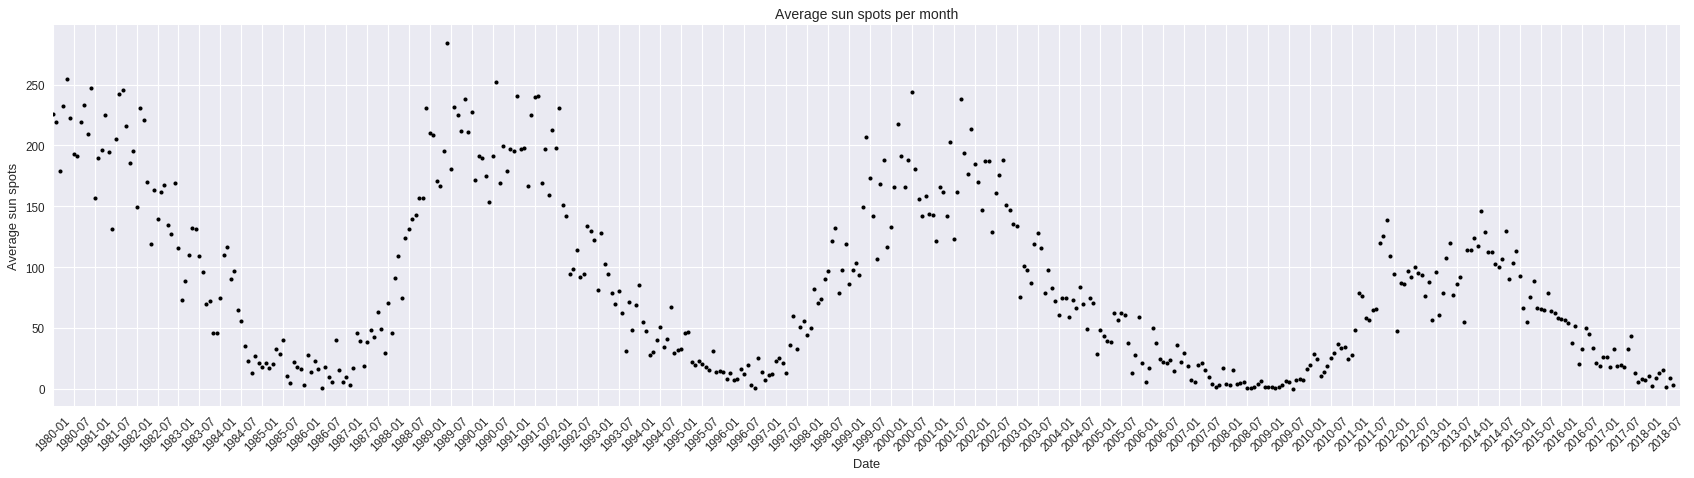

In [7]:
# Add new column with formatted date
sunspots_per_month['Date'] = sunspots_per_month['Year'].map(str) + '-' + sunspots_per_month['Month'].map(str).apply(lambda m: m if len(m) == 2 else '0' + m)

plot(sunspots_per_month['Date'], sunspots_per_month['Avg sun spots'])


## Moving average
Calculate rolling 7 months average (i.e. create an array that has same length as avg sunspots per month and each cell corresponds to a mean of surrounding cells (+/- 3 cells from current position) from avg sunspots per month)

Modify plot function to plot red line if array with rolling mean is provided. Plot the graph.

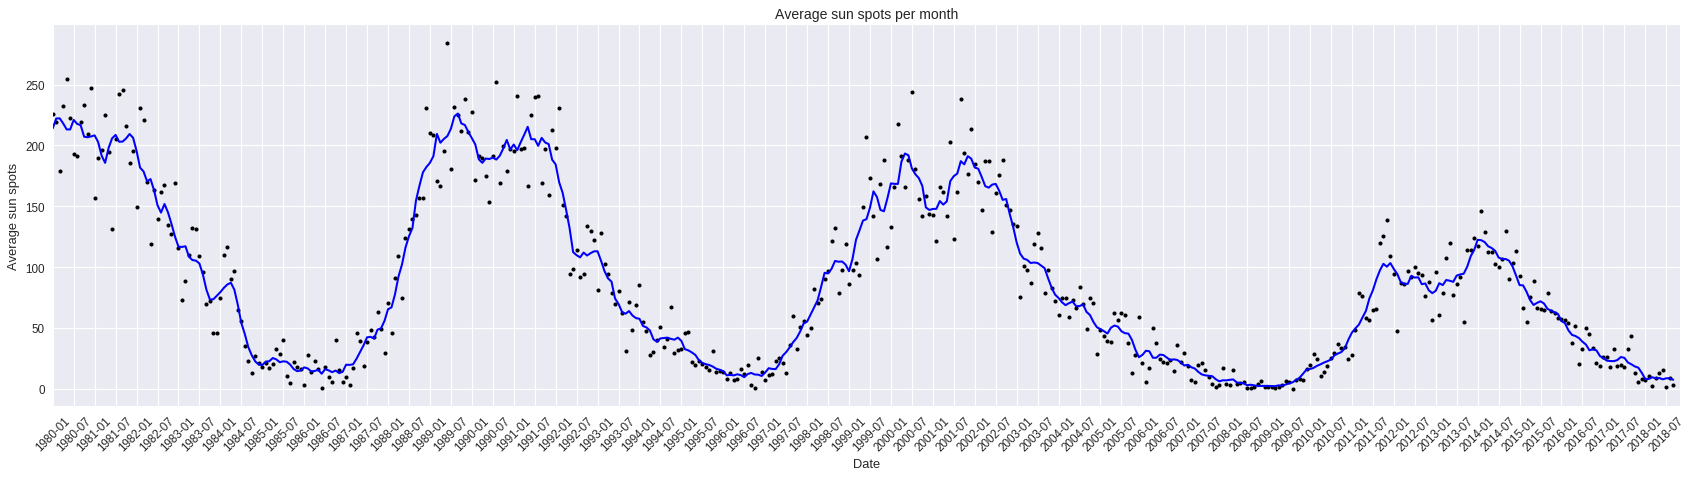

In [8]:
rolling_mean = sunspots_per_month['Avg sun spots'].rolling(window=7,center=True, min_periods=3).mean()

plot(sunspots_per_month['Date'], sunspots_per_month['Avg sun spots'], rolling_mean)


Finally calculate rolling standard devation of residuals (avg sunspots per mont - rolling average), create an array that holds None if residual is below 2 std deviations or original value if it is above. 

Modify plot function to plot red points for each outlier. Plot the graph

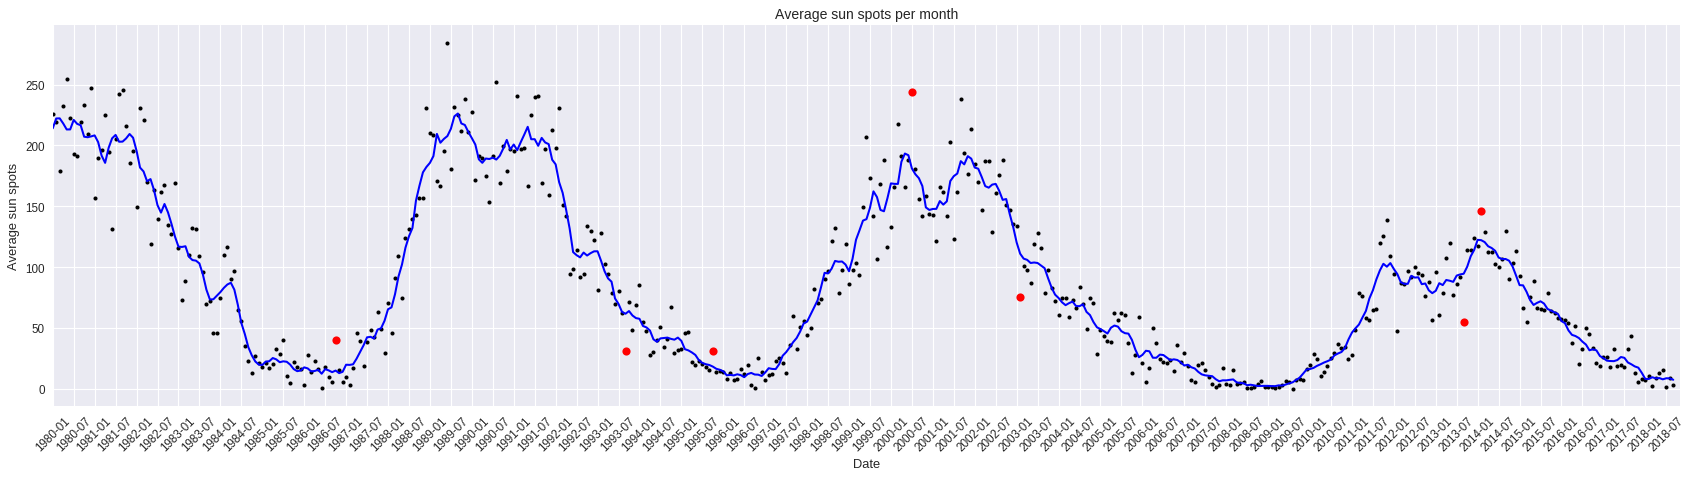

In [9]:
residuals = sunspots_per_month['Avg sun spots'] - rolling_mean
residuals_stds = residuals.rolling(window=7,center=True).std()

outliers = [v if abs(r) > 2*s else None for v,r,s in zip (sunspots_per_month['Avg sun spots'],residuals,residuals_stds)]
plot(sunspots_per_month['Date'], sunspots_per_month['Avg sun spots'], rolling_mean, outliers)


## Extra: add std lines to the plot 

Plot the selected std dev thresholds on the plot (as thin dashed black line)

In [0]:
def plot_with_threshold(x, y, rolling_average=None, outliers=None, th_modifier=None):
  
  # Create plot
  plt.figure(figsize=(len(x)/18, 6), dpi=84)

  plt.plot(x, y, color='black', marker='.', linestyle='')
  plt.title("Average sun spots per month")
  plt.xlabel("Date")
  plt.ylabel("Average sun spots")
  plt.xlim(0, len(x) + 1)
  plt.xticks(range(0,len(x),6), sunspots_per_month['Date'].values[::6], rotation=45)

  if rolling_average is not None:
    plt.plot(x, rolling_average, color='blue')
    
  if outliers is not None:
    plt.plot(x, outliers, color='red', marker='o', linestyle='')
  
  if th_modifier is not None:
    plt.plot(x, rolling_average + th_modifier, color='black', linestyle='--', linewidth=0.5)
    plt.plot(x, rolling_average - th_modifier, color='black', linestyle='--', linewidth=0.5)
  
  plt.grid(True)
  plt.show()

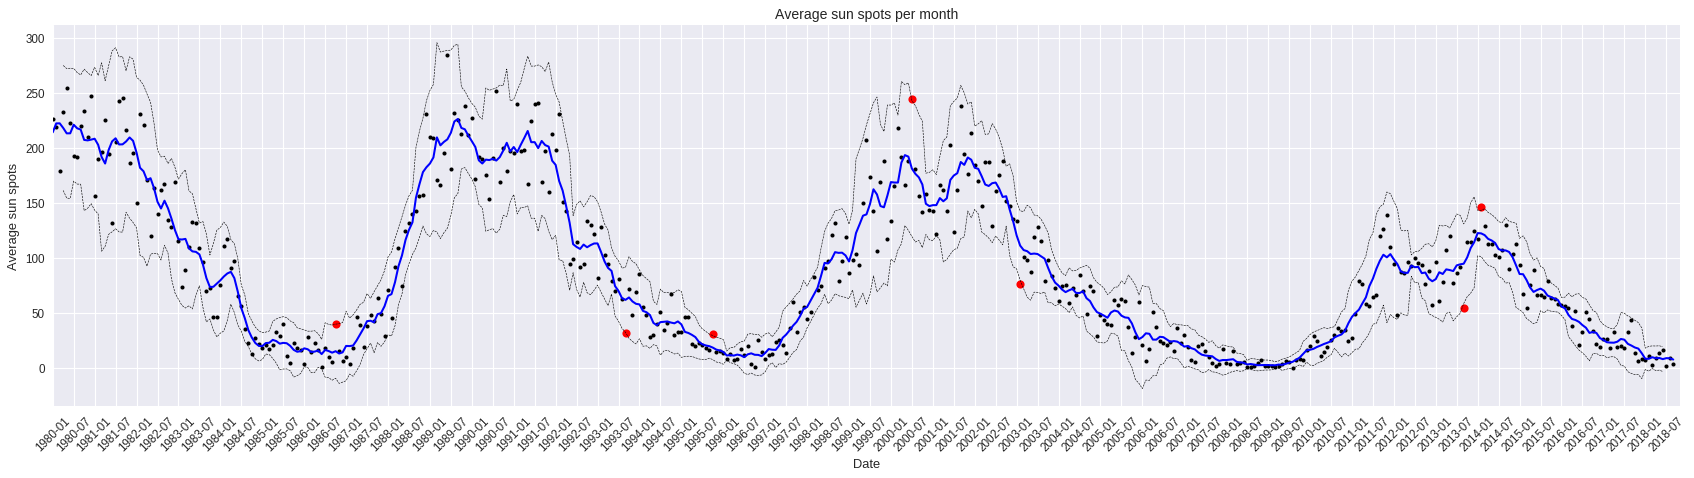

In [11]:
plot_with_threshold(sunspots_per_month['Date'], sunspots_per_month['Avg sun spots'], rolling_mean, outliers, 2*residuals_stds)

Add form to easly change parameters (threshold (x numbers of std devs) and window size). Play with different window sizes and thresholds and see how detection of otiliers changes.

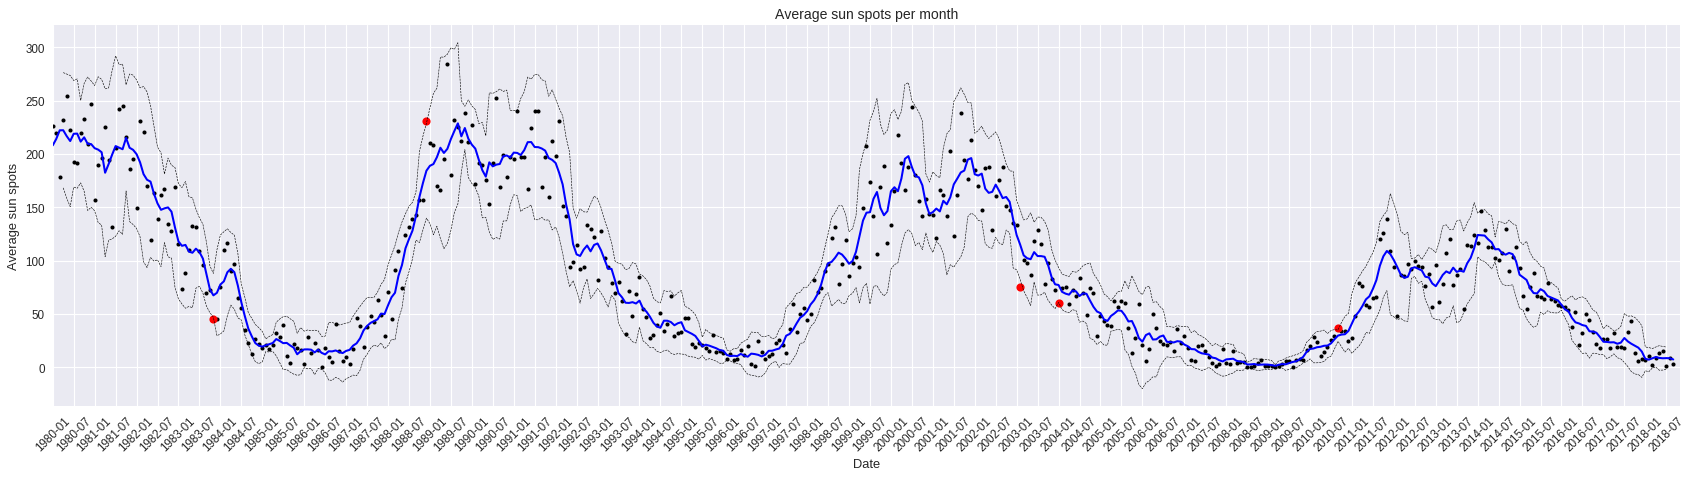

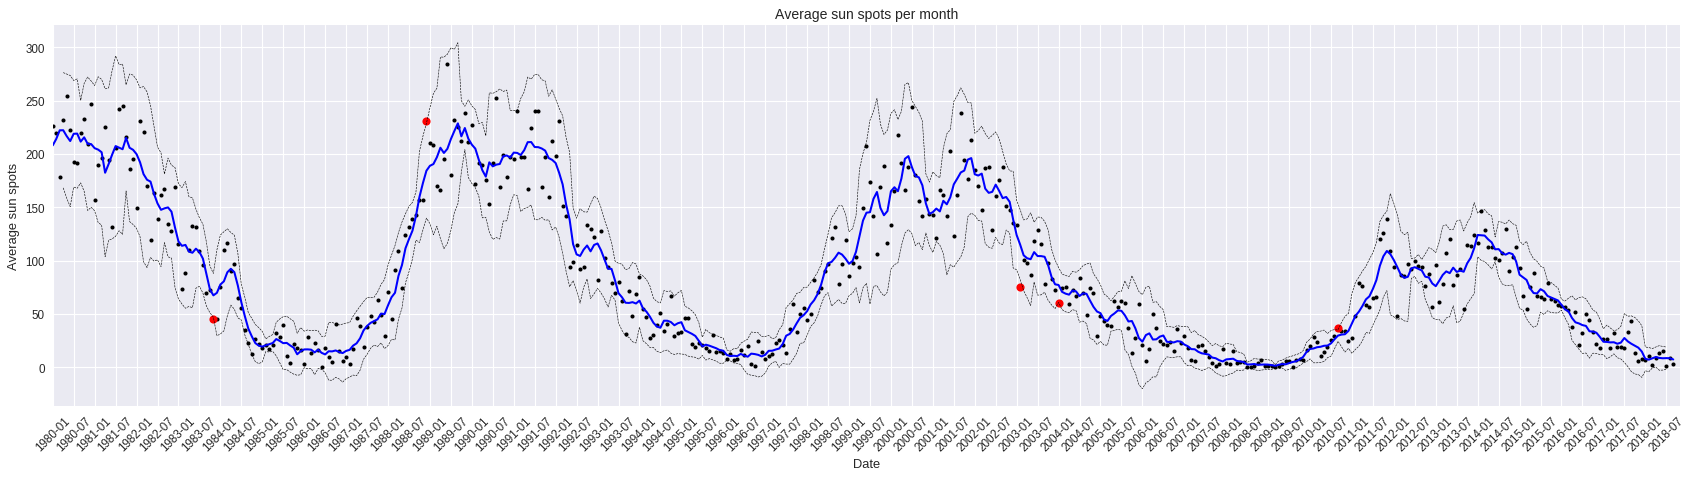

In [25]:
#@title Anomaly detection { run: "auto" }
window_size = 6 #@param {type:"integer"}
threshold = 2 #@param {type:"number"}

rolling_mean = sunspots_per_month['Avg sun spots'].rolling(window=window_size,center=True, min_periods=3).mean()
residuals = sunspots_per_month['Avg sun spots'] - rolling_mean
residuals_stds = residuals.rolling(window=window_size,center=True).std()
outliers = [v if abs(r) > threshold*s else None for v,r,s in zip (sunspots_per_month['Avg sun spots'],residuals,residuals_stds)]

plot_with_threshold(sunspots_per_month['Date'], sunspots_per_month['Avg sun spots'], rolling_mean, outliers, threshold*residuals_stds)